### RFM 분석실습

- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns

In [2]:
path = './datasets/customer_invoice_data.csv'
ci_df = pd.read_csv(path)

#### 📝 데이터확인

In [3]:
ci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
ci_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
ci_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
ci_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [7]:
ci_df['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [8]:
ci_df['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

###  📝  중복값 확인

In [113]:
dup= ci_df.duplicated().sum()
print(dup)

5268


###  📝  결측치 확인 및 처리

#### 결측치 확인

In [10]:
ci_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# 각 결측치 처리 전 차지하는 비율 확인
(ci_df.isnull().sum()/len(ci_df)).round(4)

InvoiceNo      0.0000
StockCode      0.0000
Description    0.0027
Quantity       0.0000
InvoiceDate    0.0000
UnitPrice      0.0000
CustomerID     0.2493
Country        0.0000
dtype: float64

In [12]:
# 결측치 대체를 위해 같은 stockCode가 있는지 확인

# 'description' 컬럼의 결측치 여부 확인
missing_description = ci_df[ci_df['Description'].isna()]
print(missing_description['StockCode'].value_counts())

# 결측치가 있는 행의 StockCode 값을 리스트로 변환
missing_stock_codes = missing_description['StockCode'].tolist()

# missing_description의 StockCode가 기존DF에 StockCode와 같은게 있는지 확인
duplicated_rows = ci_df[ci_df['StockCode'].isin(missing_stock_codes)]

# 결과 출력
if not duplicated_rows.empty:
    display(duplicated_rows)
else:
    print("No duplicated rows found based on 'StockCode' and missing 'Description'.")

StockCode
35965     10
23084     10
22084      9
22451      6
22501      5
          ..
16169P     1
84846A     1
82545A     1
84251F     1
85175      1
Name: count, Length: 960, dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541858,581580,79321,CHILLI LIGHTS,2,12/9/2011 12:20,5.75,12748.0,United Kingdom
541874,581585,23084,RABBIT NIGHT LIGHT,12,12/9/2011 12:31,2.08,15804.0,United Kingdom
541879,581585,22726,ALARM CLOCK BAKELIKE GREEN,8,12/9/2011 12:31,3.75,15804.0,United Kingdom
541885,581585,21684,SMALL MEDINA STAMPED METAL BOWL,12,12/9/2011 12:31,0.85,15804.0,United Kingdom


In [13]:
# 원본 데이터 복제, 데이터 전처리를 위한 DF
ci_imp_df = ci_df.copy()
ci_imp_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [14]:
# description 요소 삭제
ci_imp_df = ci_imp_df.drop(columns=['Description'])
ci_imp_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [15]:
# CustomerID가 결측치인 행 찾기
missing_customer_id = ci_imp_df[ci_imp_df['CustomerID'].isna()]

# 결측치가 있는 행의 InvoiceNo 값을 가져오기
invoice_nos_with_missing_customer_id = missing_customer_id['InvoiceNo'].tolist()

# 결측치가 있는 행의 InvoiceNo가 기존 데이터프레임에 있는지 확인
duplicated_rows = ci_imp_df[ci_imp_df['InvoiceNo'].isin(invoice_nos_with_missing_customer_id)]['CustomerID']
display(duplicated_rows[duplicated_rows.isna()==False].count())

# 결과 : 결측치와 동일한 invoice는 전부 결측치로 들어가 있음

0

In [16]:
# CustomerId의 결측치 삭제
ci_imp_df = ci_imp_df.dropna(axis=0)
display(ci_imp_df)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


#### 1차 제거 여부 확인

In [17]:
ci_imp_df.isna().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
# 각 결측치 1차 처리 후 차지하는 비율 확인
(ci_imp_df.isnull().sum()/len(ci_imp_df)).round(4)

InvoiceNo      0.0
StockCode      0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

###  📝 이상치 처리

#### 수량이 음수인 경우 처리

In [92]:
ci_imp_df = ci_imp_df.copy()

# Quantity 열이 0보다 작거나 같은 행의 인덱스 가져오기
index_to_drop = ci_imp_df[ci_imp_df.loc[:,'Quantity'] <= 0].index

# 인덱스를 기준으로 행 삭제
ci_imp_df.drop(index_to_drop, inplace=True)

# 삭제된 결과 확인
display(ci_imp_df)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


#### 상품 단가가 음수인 경우 처리

In [93]:
ci_imp_df = ci_imp_df.copy()

# UnitPrice 열이 0보다 작거나 같은 행의 인덱스 가져오기
index_to_drop = ci_imp_df[ci_imp_df.loc[:, 'UnitPrice'] < 0].index

# 인덱스를 기준으로 행 삭제
ci_imp_df.drop(index_to_drop, inplace=True)

# 삭제된 결과 확인
display(ci_imp_df)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [21]:
ci_imp_df[ci_imp_df['Quantity']<0]
ci_imp_df[ci_imp_df['UnitPrice']<0]

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


#### 상품코드 이상치 처리

In [94]:
ci_imp_df = ci_imp_df.copy()
# 상품 코드에 숫자가 있는 경우 => 정상치
# 상품 코드가 일반적이지 않은 경우 판별하여 새로운 칼럼으로
ci_imp_df['CodeCheck'] = ci_imp_df.loc[:,'StockCode'].apply(lambda x: any(stockcode.isdigit() for stockcode in x))
ci_imp_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CodeCheck
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,True
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,True
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,True
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,True
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,True
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,True
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,True


In [23]:
# 상품 코드에 숫자가 포함된 정상치만 df 로 담아주기
ci_imp_df = ci_imp_df[ci_imp_df['CodeCheck'] == True]

In [24]:
ci_imp_df = ci_imp_df.drop(columns=['CodeCheck'])
ci_imp_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


#### 각 값의 숫자 확인

In [25]:
ci_imp_df['InvoiceNo'].value_counts()

InvoiceNo
576339    541
579196    532
580727    528
578270    441
573576    434
         ... 
556456      1
556454      1
579006      1
556446      1
553153      1
Name: count, Length: 18408, dtype: int64

In [26]:
ci_imp_df['CustomerID'].value_counts()

CustomerID
17841.0    7838
14911.0    5675
14096.0    5095
12748.0    4580
14606.0    2697
           ... 
14705.0       1
13841.0       1
17715.0       1
18084.0       1
13099.0       1
Name: count, Length: 4335, dtype: int64

In [27]:
ci_imp_df['StockCode'].value_counts()

StockCode
85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
          ... 
90059D       1
90168        1
90169        1
90202A       1
23843        1
Name: count, Length: 3660, dtype: int64

### 📝 데이터 전처리

기준점 : CustomerID
- StockCode, 각 물품의 주문 수량, 물품별 판매량 파악가능
- Description, 각 물품의 상품 코드를 추후 발표자료에서 Description으로 대체
- InvoiceDate, 날짜형식으로 변경

- R : 오늘날짜 - InvoiceDate
- F : groupby InvoiceNo / count coustomerID
- M : invoice별 총금액(가격*수량) / coustomerID 총금액 순

#### 날짜 기준점 세우기

In [28]:
# 분석할 df
ci_df2 = ci_imp_df.copy()
ci_df2

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [29]:
# Date

ci_df2['Date'] = pd.to_datetime(ci_imp_df['InvoiceDate']).dt.date
print(ci_df2['Date'].min())
print(ci_df2['Date'].max())

2010-12-01
2011-12-09


In [30]:
# 기준점 2012.01.01
today = pd.to_datetime('2012.01.01').date()
ci_df2['Date'] = ci_df2['Date'].apply(lambda x: (today-x).days)
ci_df2

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,396
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,396
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,23
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,23
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,23
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,23


#### 수량과 단가를 곱하여 금액 요소 형성

In [31]:
ci_df2['TotalPrice'] = ci_df2['Quantity'] * ci_df2['UnitPrice']
ci_df2

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalPrice
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,396,15.30
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396,20.34
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,396,22.00
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396,20.34
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France,23,10.20
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France,23,12.60
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France,23,16.60
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France,23,16.60


#### RFM 계산에 필요한 요소로 df 생성

In [32]:
ci_cus_df = ci_df2.groupby('InvoiceNo').agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'Date':'first',
    'CustomerID': 'first'
}).reset_index()

# 결과 확인
ci_cus_df

,InvoiceNo,Quantity,TotalPrice,Date,CustomerID
0,536365,40,139.12,396,17850.0
1,536366,12,22.20,396,17850.0
2,536367,83,278.73,396,13047.0
3,536368,15,70.05,396,13047.0
4,536369,3,17.85,396,13047.0
...,...,...,...,...,...
18403,581583,76,124.60,23,13777.0
18404,581584,120,140.64,23,13777.0
18405,581585,278,329.05,23,15804.0
18406,581586,66,339.20,23,13113.0


In [33]:
ci_cus_df.describe()

,Quantity,TotalPrice,Date,CustomerID
count,18408.000000,18408.000000,18408.000000,18408.000000
mean,280.930302,476.301209,183.967460,15272.888255
std,979.546057,1678.624099,112.789777,1731.944594
min,1.000000,0.000000,23.000000,12346.000000
25%,76.000000,157.877500,81.000000,13777.000000
50%,156.000000,302.350000,173.000000,15187.000000
75%,292.000000,465.610000,277.000000,16782.000000
max,80995.000000,168469.600000,396.000000,18287.000000


In [34]:
ci_cus_df['CustomerID'].value_counts()

CustomerID
12748.0    206
14911.0    199
17841.0    124
13089.0     97
15311.0     91
          ... 
12790.0      1
13070.0      1
13398.0      1
16483.0      1
12713.0      1
Name: count, Length: 4335, dtype: int64

#### RFM을 계산해서 컬럼이름 변경

In [35]:
ci_cus_df = ci_cus_df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum',
    'Date':'first' 
}).reset_index()

ci_cus_df
ci_cus_df = ci_cus_df.rename(columns = {'TotalPrice':'Monetary', 'Quantity':'Frequency','Date':'Recency'})
ci_cus_df

,CustomerID,Monetary,Frequency,Recency
0,12346.0,77183.60,74215,348
1,12347.0,4310.00,2458,390
2,12348.0,1437.24,2332,381
3,12349.0,1457.55,630,41
4,12350.0,294.40,196,333
...,...,...,...,...
4330,18280.0,180.60,45,300
4331,18281.0,80.82,54,203
4332,18282.0,178.05,103,149
4333,18283.0,2088.93,1395,360


#### RFM 평균을 확인하여 가중치가 필요한지 확인

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ci_cus_df[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(ci_cus_df[['Recency', 'Frequency', 'Monetary']])
ci_cus_df[['Recency', 'Frequency', 'Monetary']].mean()


Recency      0.597281
Frequency    0.006038
Monetary     0.007246
dtype: float64

In [38]:
display(ci_cus_df)

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.276507,0.375921,0.871314
1,12347.0,0.015440,0.012446,0.983914
2,12348.0,0.005149,0.011807,0.959786
3,12349.0,0.005222,0.003186,0.048257
4,12350.0,0.001055,0.000988,0.831099
...,...,...,...,...
4330,18280.0,0.000647,0.000223,0.742627
4331,18281.0,0.000290,0.000268,0.482574
4332,18282.0,0.000638,0.000517,0.337802
4333,18283.0,0.007484,0.007061,0.903485


#### recency를 최신순으로

In [39]:
ci_cus_df['Recency'] = 1 - ci_cus_df['Recency']
ci_cus_df

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.276507,0.375921,0.128686
1,12347.0,0.015440,0.012446,0.016086
2,12348.0,0.005149,0.011807,0.040214
3,12349.0,0.005222,0.003186,0.951743
4,12350.0,0.001055,0.000988,0.168901
...,...,...,...,...
4330,18280.0,0.000647,0.000223,0.257373
4331,18281.0,0.000290,0.000268,0.517426
4332,18282.0,0.000638,0.000517,0.662198
4333,18283.0,0.007484,0.007061,0.096515


#### RFM 점수 합산

In [40]:
ci_cus_df['TotalScore'] = ci_cus_df[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
ci_cus_df

,CustomerID,Monetary,Frequency,Recency,TotalScore
0,12346.0,0.276507,0.375921,0.128686,0.781115
1,12347.0,0.015440,0.012446,0.016086,0.043972
2,12348.0,0.005149,0.011807,0.040214,0.057171
3,12349.0,0.005222,0.003186,0.951743,0.960150
4,12350.0,0.001055,0.000988,0.168901,0.170943
...,...,...,...,...,...
4330,18280.0,0.000647,0.000223,0.257373,0.258243
4331,18281.0,0.000290,0.000268,0.517426,0.517984
4332,18282.0,0.000638,0.000517,0.662198,0.663353
4333,18283.0,0.007484,0.007061,0.096515,0.111059


#### 원본데이터와 결합(ci_df2)

In [41]:
ci_df2['CustomerID']

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 396503, dtype: float64

In [42]:
ci_rfm_df = pd.merge(ci_df2, ci_cus_df, on='CustomerID')
ci_rfm_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalPrice,Monetary,Frequency,Recency,TotalScore
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,396,15.30,0.019314,0.008773,0.0,0.028087
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,396,22.00,0.019314,0.008773,0.0,0.028087
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396498,581578,22993,12,12/9/2011 12:16,1.25,12713.0,Germany,23,15.00,0.002846,0.002553,1.0,1.005399
396499,581578,22907,12,12/9/2011 12:16,0.85,12713.0,Germany,23,10.20,0.002846,0.002553,1.0,1.005399
396500,581578,22908,12,12/9/2011 12:16,0.85,12713.0,Germany,23,10.20,0.002846,0.002553,1.0,1.005399
396501,581578,23215,12,12/9/2011 12:16,2.08,12713.0,Germany,23,24.96,0.002846,0.002553,1.0,1.005399


#### 등급 나누기

In [43]:
import numpy as np

l1, l2, l3, l4 = np.percentile(ci_rfm_df['TotalScore'], [20,40,70,90])
print(l1, l2, l3, l4 )

0.05686023813090685 0.15123431441302398 0.3817617967861862 0.8429878647611189


In [44]:
def get_level(x):
    if x <= l1:
        return 5
    if x <= l2:
        return 4
    if x <= l3:
        return 3
    if x <= l4:
        return 2       
    return 1

In [45]:
ci_rfm_df['Level'] = ci_rfm_df['TotalScore'].apply(get_level)
ci_rfm_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalPrice,Monetary,Frequency,Recency,TotalScore,Level
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,396,15.30,0.019314,0.008773,0.0,0.028087,5
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087,5
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,396,22.00,0.019314,0.008773,0.0,0.028087,5
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087,5
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396498,581578,22993,12,12/9/2011 12:16,1.25,12713.0,Germany,23,15.00,0.002846,0.002553,1.0,1.005399,1
396499,581578,22907,12,12/9/2011 12:16,0.85,12713.0,Germany,23,10.20,0.002846,0.002553,1.0,1.005399,1
396500,581578,22908,12,12/9/2011 12:16,0.85,12713.0,Germany,23,10.20,0.002846,0.002553,1.0,1.005399,1
396501,581578,23215,12,12/9/2011 12:16,2.08,12713.0,Germany,23,24.96,0.002846,0.002553,1.0,1.005399,1


In [46]:
ci_rfm_df['Level'] = ci_rfm_df['Level'].replace([5, 4, 3, 2, 1], ['Bronze', 'Silver', 'Gold', 'diamond','platium'])
ci_rfm_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalPrice,Monetary,Frequency,Recency,TotalScore,Level
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,396,15.30,0.019314,0.008773,0.0,0.028087,Bronze
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087,Bronze
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,396,22.00,0.019314,0.008773,0.0,0.028087,Bronze
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087,Bronze
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396498,581578,22993,12,12/9/2011 12:16,1.25,12713.0,Germany,23,15.00,0.002846,0.002553,1.0,1.005399,platium
396499,581578,22907,12,12/9/2011 12:16,0.85,12713.0,Germany,23,10.20,0.002846,0.002553,1.0,1.005399,platium
396500,581578,22908,12,12/9/2011 12:16,0.85,12713.0,Germany,23,10.20,0.002846,0.002553,1.0,1.005399,platium
396501,581578,23215,12,12/9/2011 12:16,2.08,12713.0,Germany,23,24.96,0.002846,0.002553,1.0,1.005399,platium


#### 유저 분포 확인

In [47]:
order = ['Bronze', 'Silver', 'Gold', 'diamond','platium']

print(ci_rfm_df['Level'].value_counts())

Level
Gold       119413
Bronze      79341
Silver      79266
diamond     78875
platium     39608
Name: count, dtype: int64


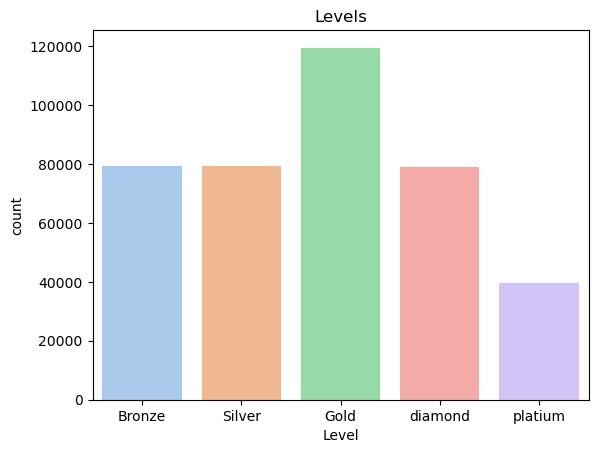

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Level', data=ci_rfm_df, palette='pastel', order=order)
plt.title('Levels')
plt.show()

#### 상품판매 추이 확인

In [49]:
# 판매빈도 수 상위 10

ci_rfm_df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending=False)[:10]

StockCode
85123A    1978
22423     1704
85099B    1600
47566     1380
84879     1375
20725     1289
22720     1146
23203     1080
20727     1052
22383     1043
Name: InvoiceNo, dtype: int64

StockCode
10002     823
10080     291
10120     193
10123C      5
10124A     16
         ... 
90214V     14
90214W     12
90214Y     61
90214Z     12
C2        134
Name: Quantity, Length: 3660, dtype: int64


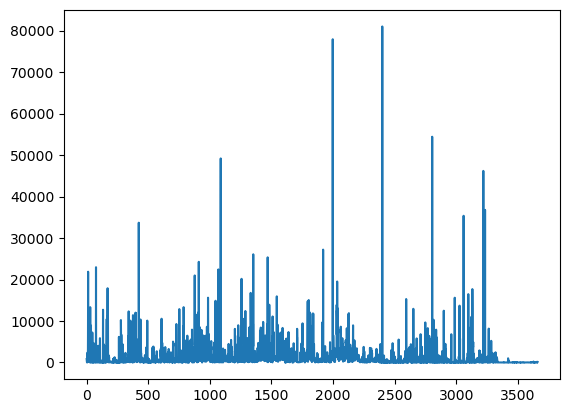

In [86]:
# 상품별 판매 수량 확인

print(ci_rfm_df.groupby('StockCode')['Quantity'].sum())
plt.plot(ci_rfm_df.groupby('StockCode')['Quantity'].sum().values)
plt.show()

In [52]:
# 주문 시간과 날짜 분리
ci_rfm_df['InvoiceDate'] = pd.to_datetime(ci_rfm_df['InvoiceDate'])
ci_rfm_df['InvoiceTime'] = ci_rfm_df['InvoiceDate'].dt.time
ci_rfm_df['InvoiceDate'] = ci_rfm_df['InvoiceDate'].dt.date

ci_rfm_df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalPrice,Monetary,Frequency,Recency,TotalScore,Level,InvoiceTime
0,536365,85123A,6,2010-12-01,2.55,17850.0,United Kingdom,396,15.30,0.019314,0.008773,0.0,0.028087,Bronze,08:26:00
1,536365,71053,6,2010-12-01,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087,Bronze,08:26:00
2,536365,84406B,8,2010-12-01,2.75,17850.0,United Kingdom,396,22.00,0.019314,0.008773,0.0,0.028087,Bronze,08:26:00
3,536365,84029G,6,2010-12-01,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087,Bronze,08:26:00
4,536365,84029E,6,2010-12-01,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087,Bronze,08:26:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396498,581578,22993,12,2011-12-09,1.25,12713.0,Germany,23,15.00,0.002846,0.002553,1.0,1.005399,platium,12:16:00
396499,581578,22907,12,2011-12-09,0.85,12713.0,Germany,23,10.20,0.002846,0.002553,1.0,1.005399,platium,12:16:00
396500,581578,22908,12,2011-12-09,0.85,12713.0,Germany,23,10.20,0.002846,0.002553,1.0,1.005399,platium,12:16:00
396501,581578,23215,12,2011-12-09,2.08,12713.0,Germany,23,24.96,0.002846,0.002553,1.0,1.005399,platium,12:16:00


In [53]:
# InvoiceDate 열을 datetime 유형으로 변환
ci_rfm_df['InvoiceDate'] = pd.to_datetime(ci_rfm_df['InvoiceDate'])

# 분기를 추출하여 새로운 열 추가
ci_rfm_df['Quarter'] = ci_rfm_df['InvoiceDate'].dt.quarter

# 결과 확인
display(ci_rfm_df)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalPrice,Monetary,Frequency,Recency,TotalScore,Level,InvoiceTime,Quarter
0,536365,85123A,6,2010-12-01,2.55,17850.0,United Kingdom,396,15.30,0.019314,0.008773,0.0,0.028087,Bronze,08:26:00,4
1,536365,71053,6,2010-12-01,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087,Bronze,08:26:00,4
2,536365,84406B,8,2010-12-01,2.75,17850.0,United Kingdom,396,22.00,0.019314,0.008773,0.0,0.028087,Bronze,08:26:00,4
3,536365,84029G,6,2010-12-01,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087,Bronze,08:26:00,4
4,536365,84029E,6,2010-12-01,3.39,17850.0,United Kingdom,396,20.34,0.019314,0.008773,0.0,0.028087,Bronze,08:26:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396498,581578,22993,12,2011-12-09,1.25,12713.0,Germany,23,15.00,0.002846,0.002553,1.0,1.005399,platium,12:16:00,4
396499,581578,22907,12,2011-12-09,0.85,12713.0,Germany,23,10.20,0.002846,0.002553,1.0,1.005399,platium,12:16:00,4
396500,581578,22908,12,2011-12-09,0.85,12713.0,Germany,23,10.20,0.002846,0.002553,1.0,1.005399,platium,12:16:00,4
396501,581578,23215,12,2011-12-09,2.08,12713.0,Germany,23,24.96,0.002846,0.002553,1.0,1.005399,platium,12:16:00,4


In [98]:
ci_rfm_df.drop(columns=['Date','Monetary','Frequency','Recency','InvoiceTime'])

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalScore,Level,Quarter
0,536365,85123A,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,0.028087,Bronze,4
1,536365,71053,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,0.028087,Bronze,4
2,536365,84406B,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,0.028087,Bronze,4
3,536365,84029G,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,0.028087,Bronze,4
4,536365,84029E,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,0.028087,Bronze,4
...,...,...,...,...,...,...,...,...,...,...,...
396498,581578,22993,12,2011-12-09,1.25,12713.0,Germany,15.00,1.005399,platium,4
396499,581578,22907,12,2011-12-09,0.85,12713.0,Germany,10.20,1.005399,platium,4
396500,581578,22908,12,2011-12-09,0.85,12713.0,Germany,10.20,1.005399,platium,4
396501,581578,23215,12,2011-12-09,2.08,12713.0,Germany,24.96,1.005399,platium,4


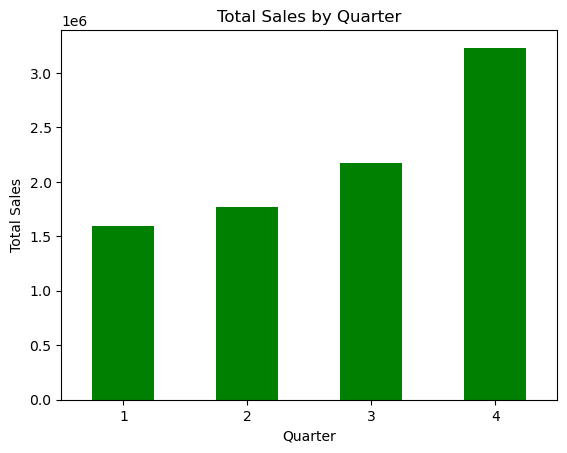

In [54]:
# 각 분기별 매출액 계산
quarterly_sales = ci_rfm_df.groupby('Quarter')['TotalPrice'].sum()

# 시각화
quarterly_sales.plot(kind='bar', color='green')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Total Sales by Quarter')
plt.xticks(rotation=0)  # x축 레이블 회전
plt.show()

<Axes: xlabel='InvoiceDate'>

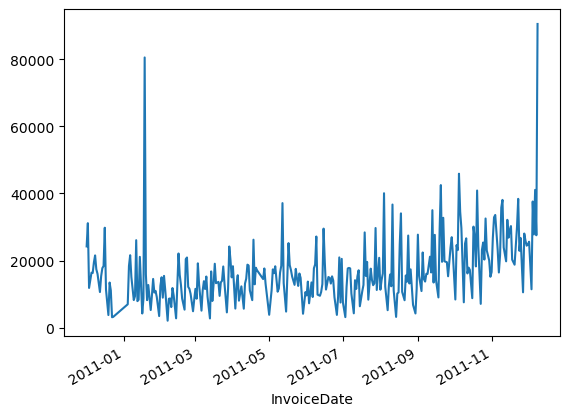

In [95]:
# 일자별 총 거래 수량
date_quantity_series = ci_rfm_df.groupby('InvoiceDate')['Quantity'].sum()
date_quantity_series.plot()

In [56]:
# 일자별 총 거래 횟수를 탐색
date_transaction_series = ci_rfm_df.groupby('InvoiceDate')['InvoiceNo'].nunique()
date_transaction_series

InvoiceDate
2010-12-01    121
2010-12-02    136
2010-12-03     57
2010-12-05     87
2010-12-06     94
             ... 
2011-12-05    115
2011-12-06    110
2011-12-07    103
2011-12-08    113
2011-12-09     41
Name: InvoiceNo, Length: 305, dtype: int64

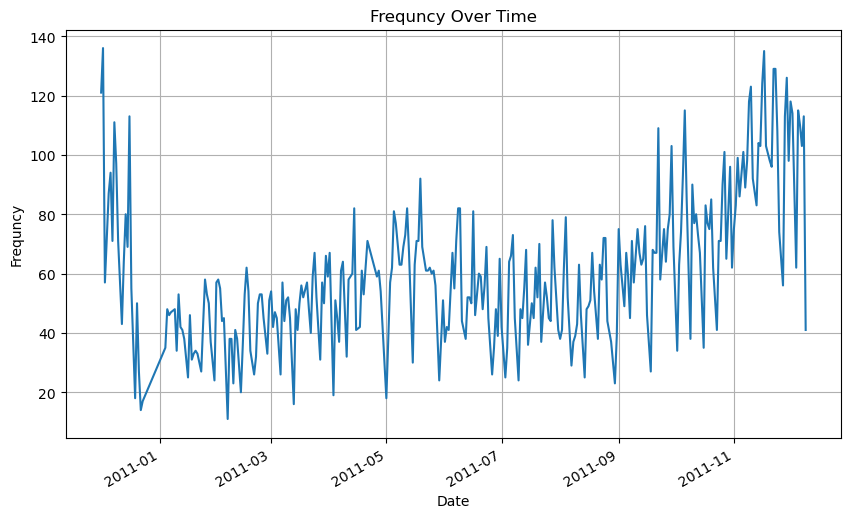

In [57]:
# 선 그래프 그리기
plt.figure(figsize=(10, 6))
date_transaction_series.plot()

# 그래프 제목과 축 레이블 설정
plt.title('Frequncy Over Time')
plt.xlabel('Date')
plt.ylabel('Frequncy')

# 그리드 추가
plt.grid(True)


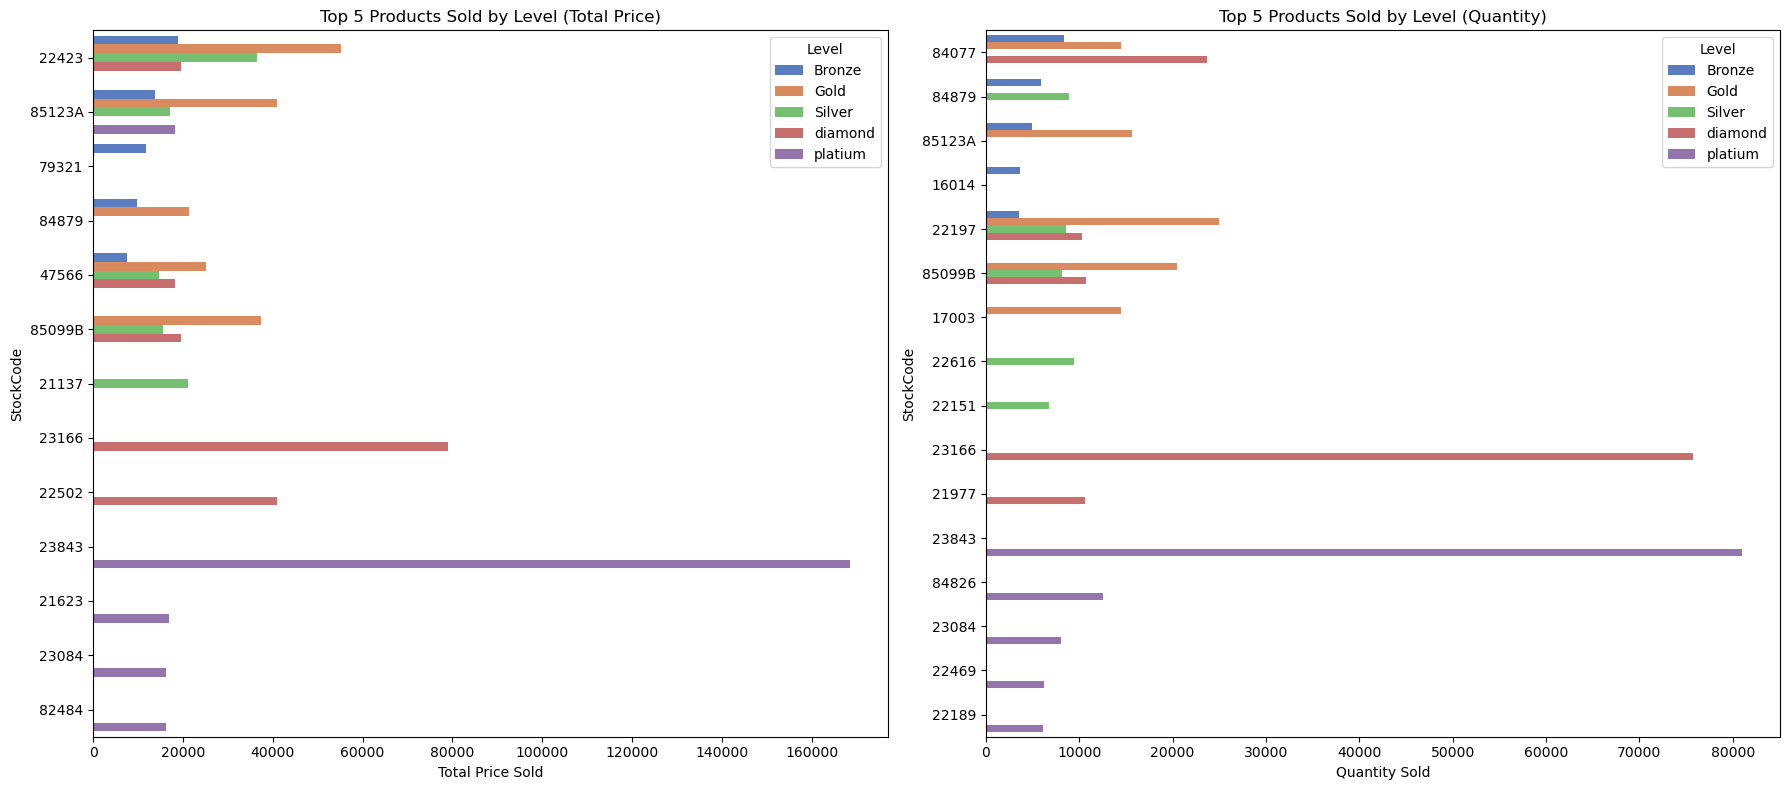

In [91]:
# 각 등급별로 가장 많이 팔린 상품 5개
top_products_by_level_total_price = ci_rfm_df.groupby(['Level', 'StockCode'])['TotalPrice'].sum().reset_index()
top_products_by_level_total_price = top_products_by_level_total_price.groupby('Level').apply(lambda x: x.nlargest(5, 'TotalPrice')).reset_index(drop=True)

top_products_by_level_quantity = ci_rfm_df.groupby(['Level', 'StockCode'])['Quantity'].sum().reset_index()
top_products_by_level_quantity = top_products_by_level_quantity.groupby('Level').apply(lambda x: x.nlargest(5, 'Quantity')).reset_index(drop=True)

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))  # 1행 2열의 subplot 생성

# TotalPrice에 대한 그래프
sns.barplot(ax=axes[0], data=top_products_by_level_total_price, x='TotalPrice', y='StockCode', hue='Level', palette='muted')

# 그래프에 제목과 축 레이블 추가
axes[0].set_title('Top 5 Products Sold by Level (Total Price)')
axes[0].set_xlabel('Total Price Sold')
axes[0].set_ylabel('StockCode')

# 범례 추가
axes[0].legend(title='Level')

# Quantity에 대한 그래프
sns.barplot(ax=axes[1], data=top_products_by_level_quantity, x='Quantity', y='StockCode', hue='Level', palette='muted')

# 그래프에 제목과 축 레이블 추가
axes[1].set_title('Top 5 Products Sold by Level (Quantity)')
axes[1].set_xlabel('Quantity Sold')
axes[1].set_ylabel('StockCode')

# 범례 추가
axes[1].legend(title='Level')

# 그래프 표시
plt.tight_layout()
plt.show()


#### 각 등급별 거래가격

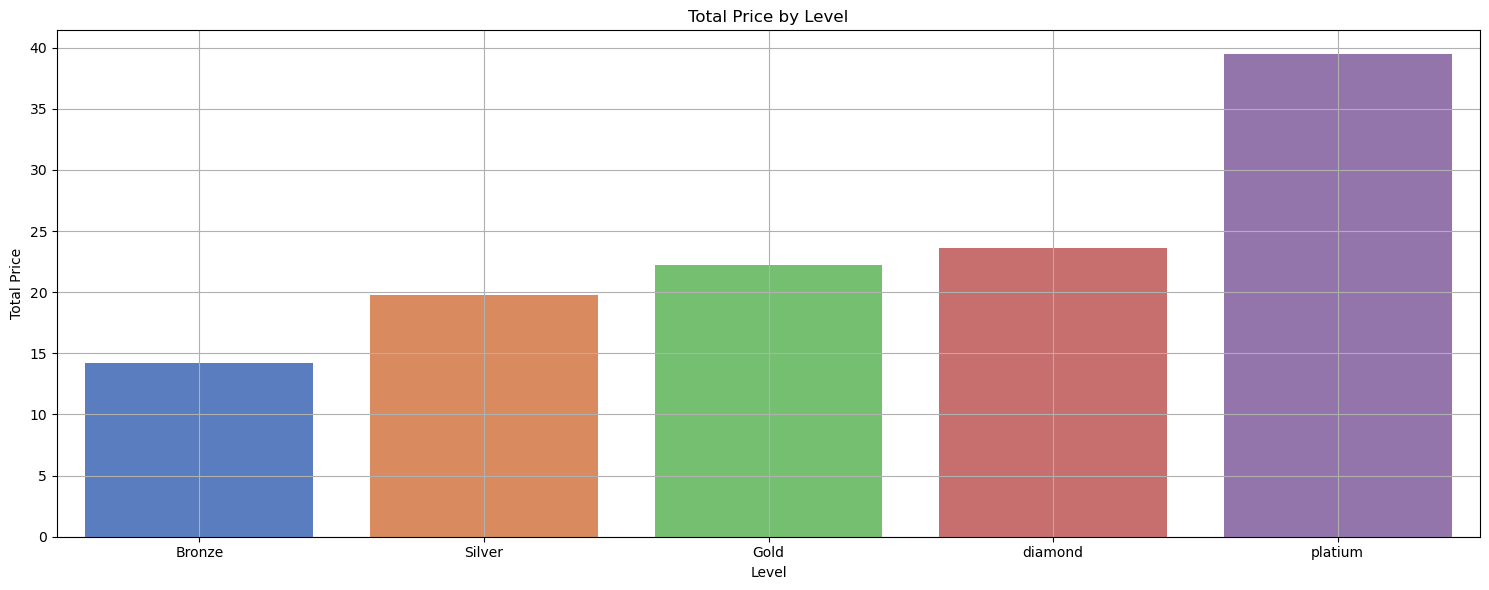

In [97]:
# 그래프 크기 설정
plt.figure(figsize=(15, 6))

# 첫 번째 subplot: 등급별 거래 가격의 총액
sns.barplot(data=ci_rfm_df, x='Level', y='TotalPrice', palette='muted', order=order, errorbar=None)
plt.title('Total Price by Level')
plt.xlabel('Level')
plt.ylabel('Total Price')

# subplot 간 간격 조정
plt.tight_layout()
plt.grid(True)

# 그래프 표시
plt.show()

#### 등급별 분기 구매량 

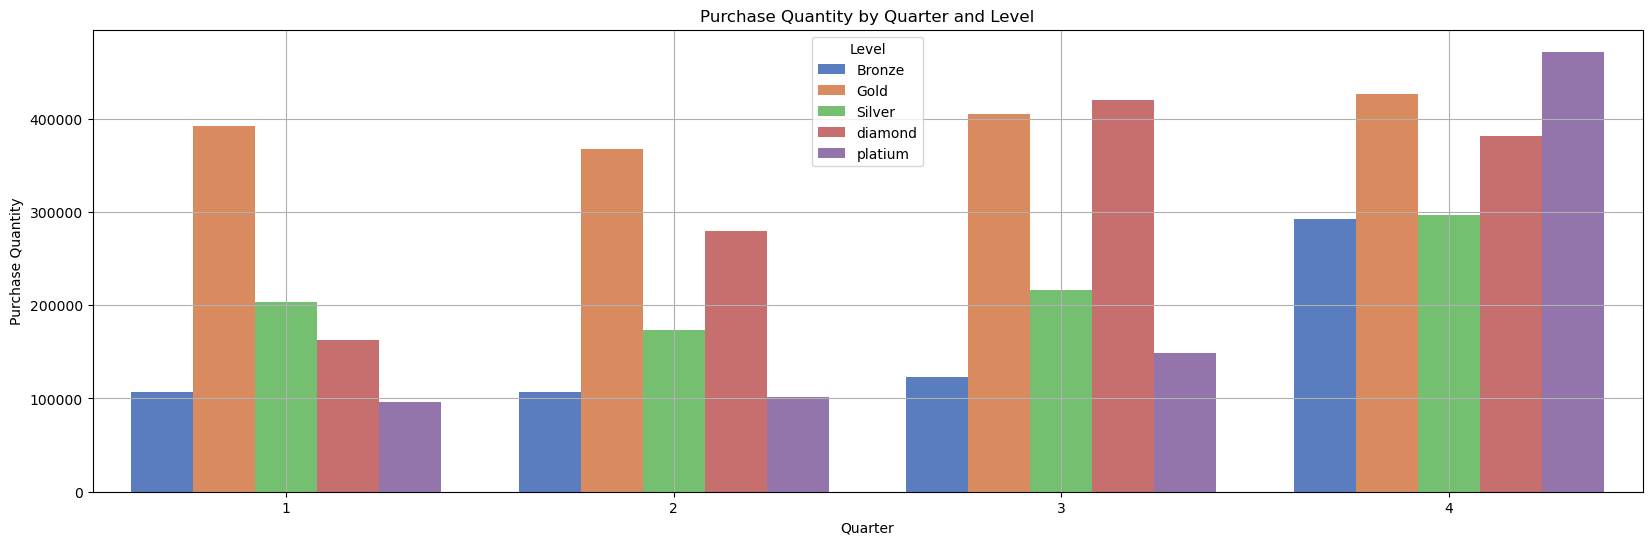

In [71]:
quarter_quantity_by_level = ci_rfm_df.groupby(['Quarter', 'Level'])['Quantity'].sum().reset_index()
# Seaborn을 사용하여 바 그래프 그리기
plt.figure(figsize=(20, 6))
sns.barplot(data=quarter_quantity_by_level, x='Quarter',y='Quantity' ,hue='Level', palette='muted')

# 그래프에 제목과 축 레이블 추가
plt.title('Purchase Quantity by Quarter and Level')
plt.xlabel('Quarter')
plt.ylabel('Purchase Quantity')

# 범례 추가
plt.legend(title='Level')

# 그래프 표시
plt.grid(True)
plt.show()

#### 등급별 분기 거래금액

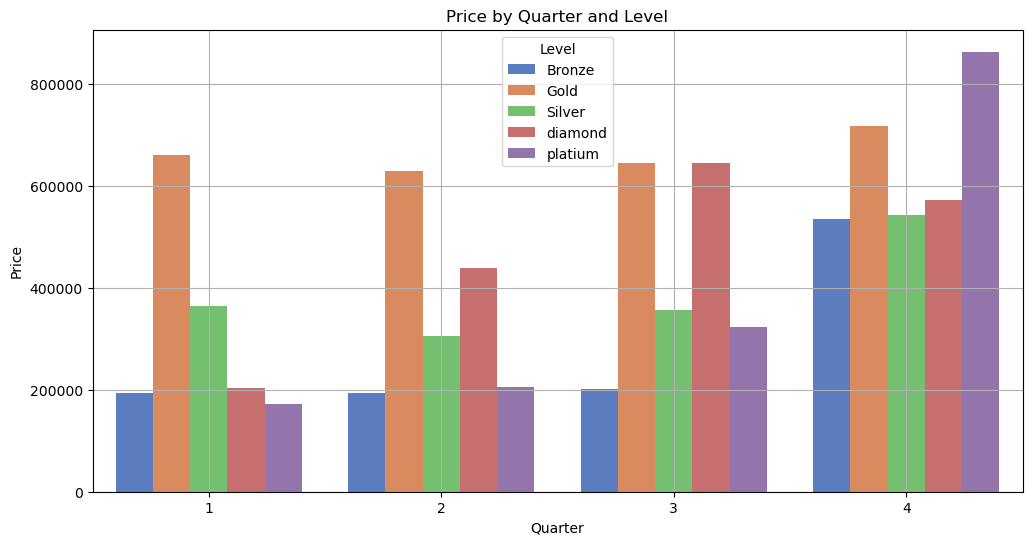

In [72]:
quarter_price_by_level = ci_rfm_df.groupby(['Quarter', 'Level'])['TotalPrice'].sum().reset_index()
# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=quarter_price_by_level, x='Quarter', y='TotalPrice', hue='Level', palette='muted')

# 그래프에 제목과 축 레이블 추가
plt.title('Price by Quarter and Level')
plt.xlabel('Quarter')
plt.ylabel('Price')

# 범례 추가
plt.legend(title='Level')

# 그래프 표시
plt.grid(True)
plt.show()

In [109]:
ci_rfm_df['Country'].value_counts()

Country
United Kingdom          354035
Germany                   8659
France                    8036
EIRE                      7236
Spain                     2423
Netherlands               2326
Belgium                   1935
Switzerland               1811
Portugal                  1425
Australia                 1184
Norway                    1049
Channel Islands            747
Italy                      741
Finland                    647
Cyprus                     612
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     248
Unspecified                244
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon                     45


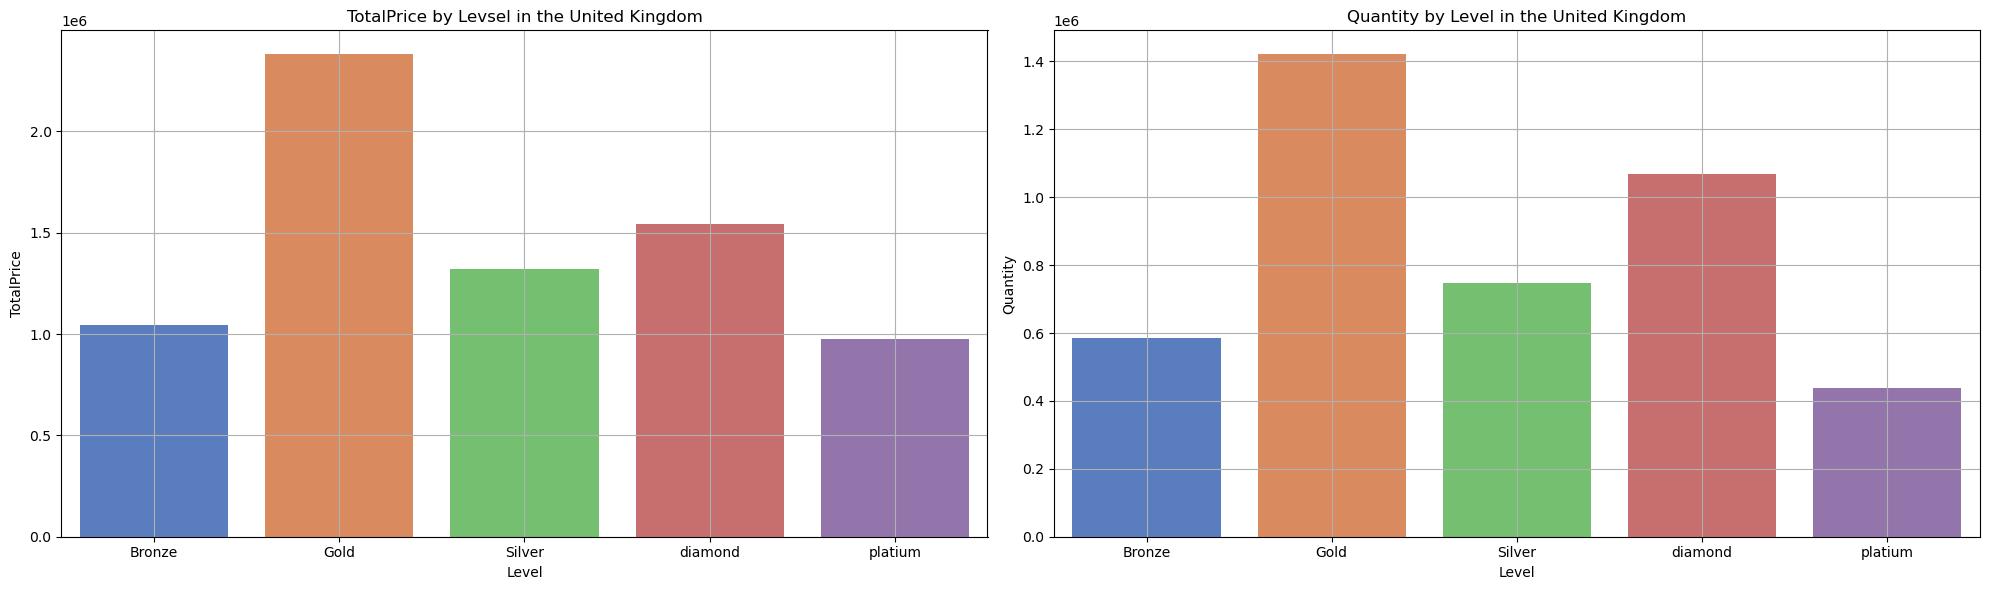

In [127]:
# 영국 데이터만 필터링
uk_data = ci_rfm_df[ci_rfm_df['Country'] == 'United Kingdom']

# 각 등급별 매출을 나타내는 새로운 데이터프레임 생성
uk_revenue_by_level_price = uk_data.groupby(['Level'])['TotalPrice'].sum().reset_index()
uk_revenue_by_level_quantity = uk_data.groupby(['Level'])['Quantity'].sum().reset_index()

# 그래프 크기 설정
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# TotalPrice 그래프
sns.barplot(data=uk_revenue_by_level_price, x='Level', y='TotalPrice', palette='muted', ax=axs[0])
axs[0].set_title('TotalPrice by Levsel in the United Kingdom')
axs[0].set_xlabel('Level')
axs[0].set_ylabel('TotalPrice')
axs[0].grid(True)

# Quantity 그래프
sns.barplot(data=uk_revenue_by_level_quantity, x='Level', y='Quantity', palette='muted', ax=axs[1])
axs[1].set_title('Quantity by Level in the United Kingdom')
axs[1].set_xlabel('Level')
axs[1].set_ylabel('Quantity')
axs[1].grid(True)

# 그래프 표시
plt.tight_layout()
plt.show()

In [120]:
# 네덜란드 데이터만 필터링
ne_data = ci_rfm_df[ci_rfm_df['Country'] == 'Netherlands']

# 각 등급별 매출을 나타내는 새로운 데이터프레임 생성
ne_revenue_by_level = ne_data.groupby(['Level'])['TotalPrice'].sum().reset_index()
ne_quantity_by_level = ne_data.groupby(['Level'])['Quantity'].sum().reset_index()

# 아일렌드 데이터만 필터링
ei_data = ci_rfm_df[ci_rfm_df['Country'] == 'EIRE']

# 각 등급별 매출을 나타내는 새로운 데이터프레임 생성
ei_revenue_by_level = ei_data.groupby(['Level'])['TotalPrice'].sum().reset_index()
ei_quantity_by_level = ei_data.groupby(['Level'])['Quantity'].sum().reset_index()


# 호주 데이터만 필터링
aus_data = ci_rfm_df[ci_rfm_df['Country'] == 'Australia']

# 각 등급별 매출을 나타내는 새로운 데이터프레임 생성
aus_revenue_by_level = aus_data.groupby(['Level'])['TotalPrice'].sum().reset_index()
aus_quantity_by_level = ne_data.groupby(['Level'])['Quantity'].sum().reset_index()


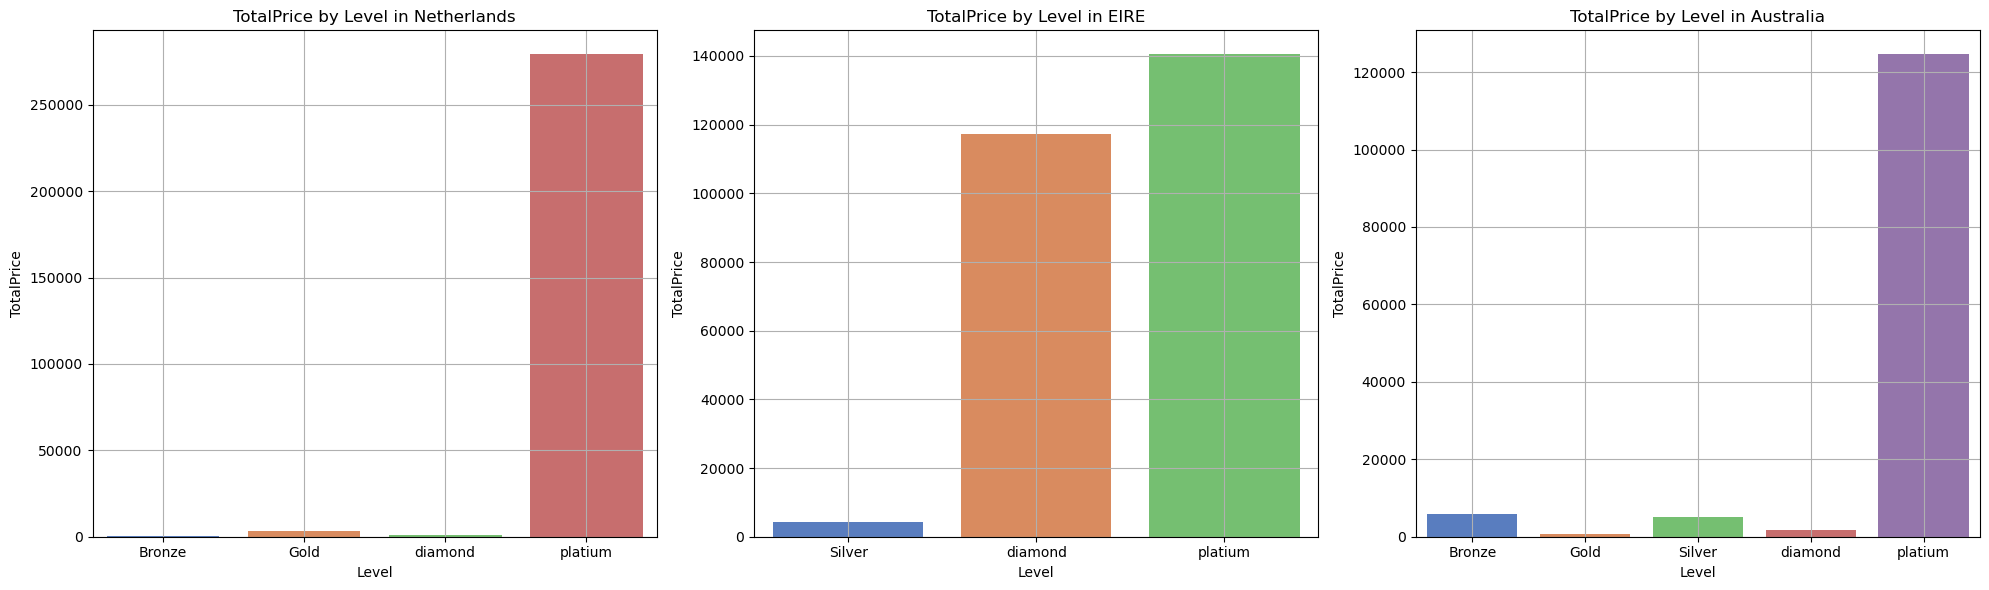

In [107]:
# 그래프 크기 설정
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# 네덜란드 데이터 그래프
sns.barplot(data=ne_revenue_by_level, x='Level', y='TotalPrice', palette='muted', ax=axs[0])
axs[0].set_title('TotalPrice by Level in Netherlands')
axs[0].set_xlabel('Level')
axs[0].set_ylabel('TotalPrice')
axs[0].grid(True)

# 아일렌드 데이터 그래프
sns.barplot(data=ei_revenue_by_level, x='Level', y='TotalPrice', palette='muted', ax=axs[1])
axs[1].set_title('TotalPrice by Level in EIRE')
axs[1].set_xlabel('Level')
axs[1].set_ylabel('TotalPrice')
axs[1].grid(True)

# 호주 데이터 그래프
sns.barplot(data=aus_revenue_by_level, x='Level', y='TotalPrice', palette='muted', ax=axs[2])
axs[2].set_title('TotalPrice by Level in Australia')
axs[2].set_xlabel('Level')
axs[2].set_ylabel('TotalPrice')
axs[2].grid(True)

# 그래프 표시
plt.tight_layout()
plt.show()


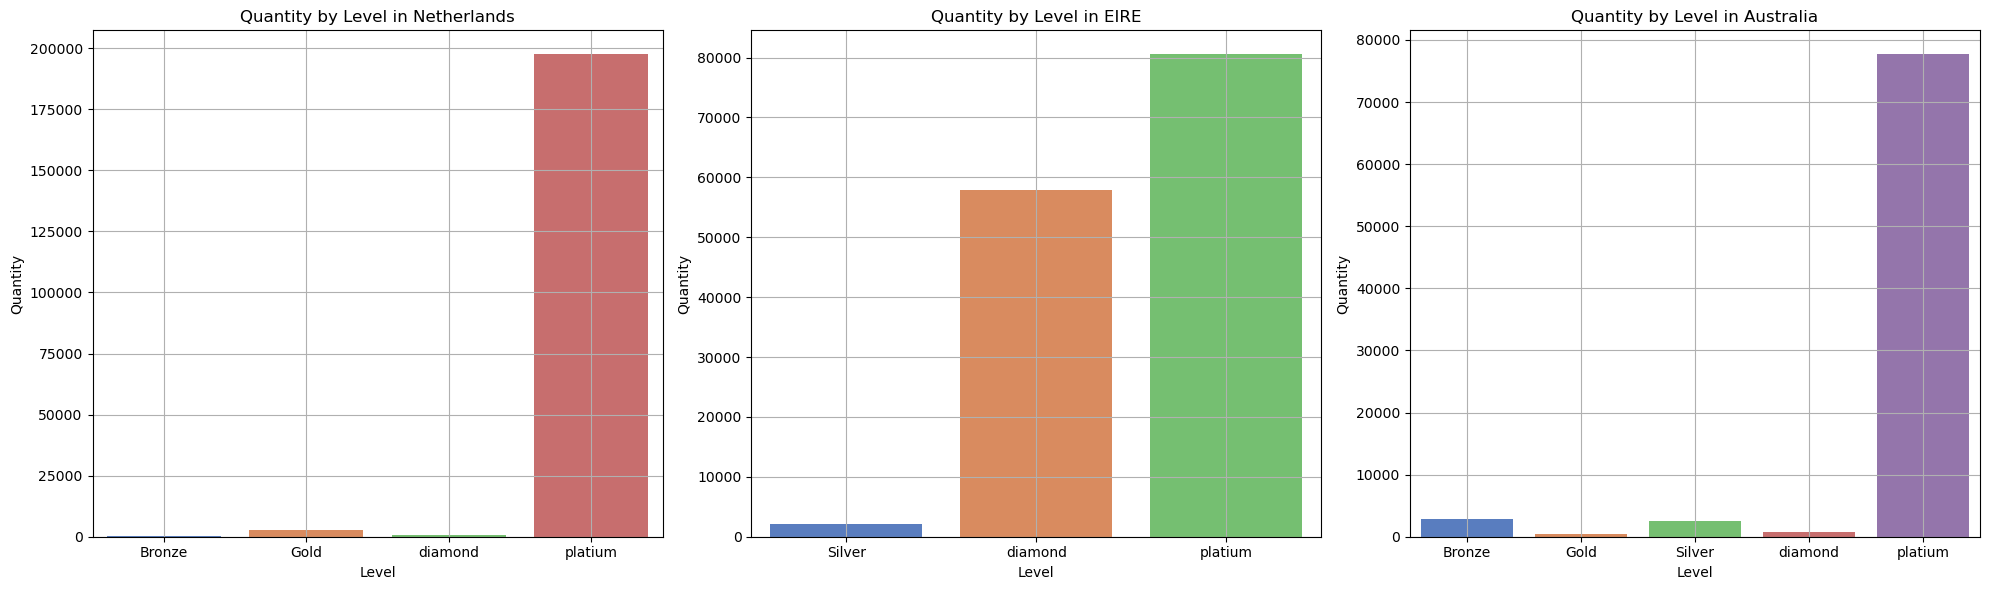

In [121]:
# 그래프 크기 설정
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# 네덜란드 데이터 그래프
sns.barplot(data=ne_quantity_by_level, x='Level', y='Quantity', palette='muted', ax=axs[0])
axs[0].set_title('Quantity by Level in Netherlands')
axs[0].set_xlabel('Level')
axs[0].set_ylabel('Quantity')
axs[0].grid(True)

# 아일렌드 데이터 그래프
sns.barplot(data=ei_quantity_by_level, x='Level', y='Quantity', palette='muted', ax=axs[1])
axs[1].set_title('Quantity by Level in EIRE')
axs[1].set_xlabel('Level')
axs[1].set_ylabel('Quantity')
axs[1].grid(True)

# 호주 데이터 그래프
sns.barplot(data=aus_quantity_by_level, x='Level', y='Quantity', palette='muted', ax=axs[2])
axs[2].set_title('Quantity by Level in Australia')
axs[2].set_xlabel('Level')
axs[2].set_ylabel('Quantity')
axs[2].grid(True)

# 그래프 표시
plt.tight_layout()
plt.show()


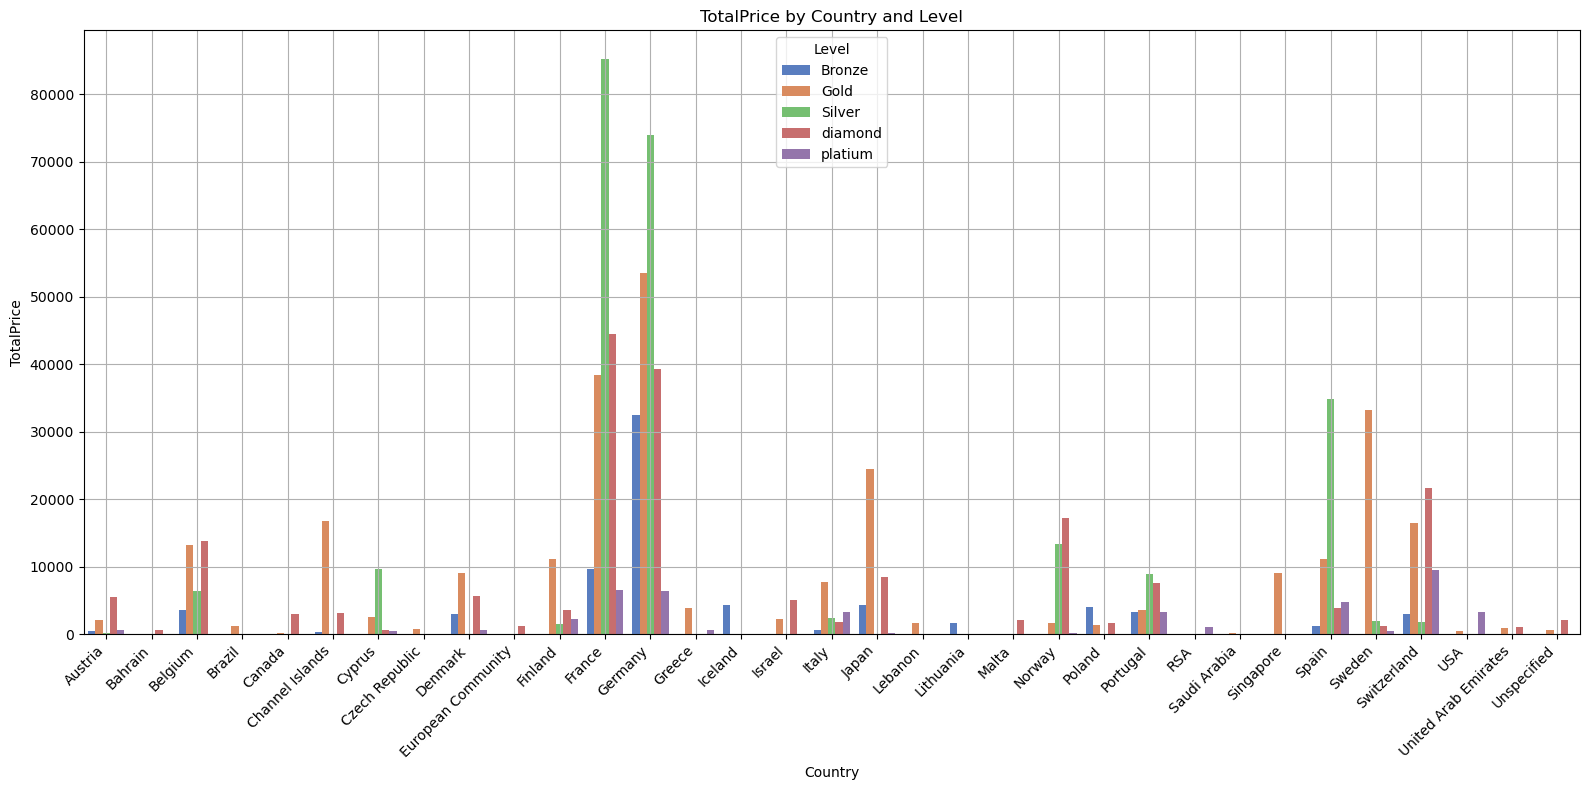

In [124]:
# 영국과 네덜란드를 제외한 다른 국가의 데이터 필터링
exclude_countries = ['United Kingdom', 'Netherlands', 'EIRE', 'Australia']
other_data = ci_rfm_df[~ci_rfm_df['Country'].isin(exclude_countries)].groupby(['Country', 'Level'])['TotalPrice'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(16, 8))
sns.barplot(data=other_data, x='Country', y='TotalPrice', hue='Level', palette='muted', errorbar=None)

# 그래프에 제목과 축 레이블 추가
plt.title('TotalPrice by Country and Level')
plt.xlabel('Country')
plt.ylabel('TotalPrice')

# 범례 추가
plt.legend(title='Level')

# x축 라벨이 겹치지 않도록 설정
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.grid(True)
plt.tight_layout()  # 레이아웃 조정
plt.show()

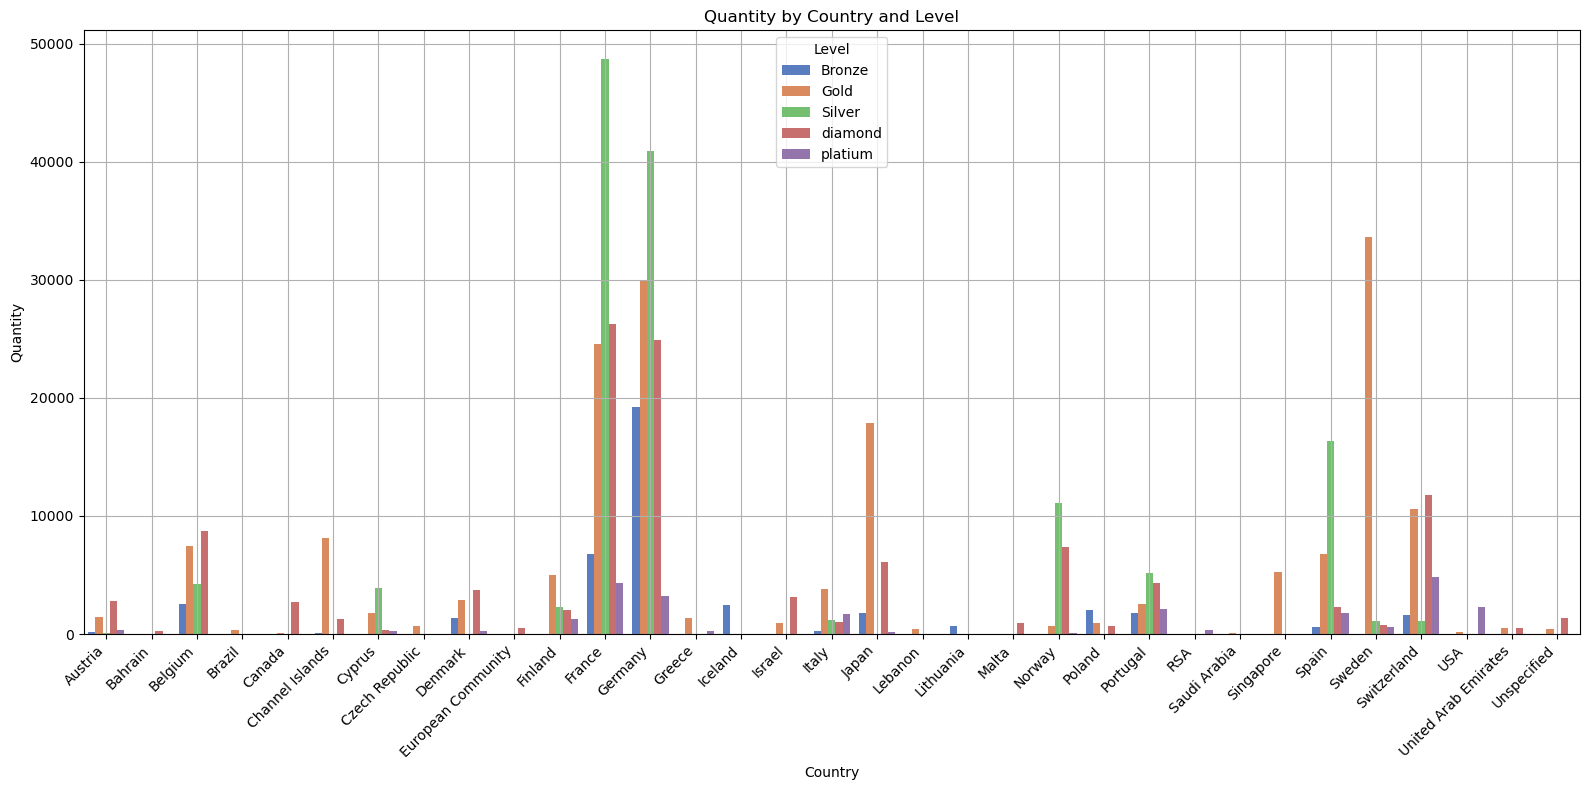

In [122]:
# 영국과 네덜란드를 제외한 다른 국가의 데이터 필터링
exclude_countries = ['United Kingdom', 'Netherlands', 'EIRE', 'Australia']
other_data = ci_rfm_df[~ci_rfm_df['Country'].isin(exclude_countries)].groupby(['Country', 'Level'])['Quantity'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(16, 8))
sns.barplot(data=other_data, x='Country', y='Quantity', hue='Level', palette='muted', errorbar=None)

# 그래프에 제목과 축 레이블 추가
plt.title('Quantity by Country and Level')
plt.xlabel('Country')
plt.ylabel('Quantity')

# 범례 추가
plt.legend(title='Level')

# x축 라벨이 겹치지 않도록 설정
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.grid(True)
plt.tight_layout()  # 레이아웃 조정
plt.show()

# 분석 결과

1. **등급별 분포**
   - 등급의 분포는 Gold가 가장 많고, 그 다음으로 Bronze, Silver, Diamond, Platium 순으로 나타났습니다.

2. **등급별 물품 순위**
   - Platium의 경우 다른 등급과 전혀 다른 물품이 인기상품습니다. 으로 나타났- 니다. 특히, Platium 등급에서는 상품 코드 '23843'이 가장 많은 판매량을 기록했습니다.
   - Diamond 등급에서는 상품 코드 '23166'이 압도적인 수치를 보였습니다.
   - 4개 등급에서 인기있는 공통 상품은 '22197'이었습니다.
   - 3개 등급에서는 '85099B'와 '84077'이 인기 상품으로 나타났습니다.

3. **등급별 물품 가격 순위**
   - Platium의 상품 코드 '23843'이 가장 많은 매출을 기록했습니다.
   - Diamond 등급에서는 상품 코드 '23166'이 판매량과 매출 모두 높은 수치를 보였습니다.
   - 4개 등급에서 매출이 높은 상품은 '22423', '85123A', '47566'이었습니다.
   - 3개 등급에서는 '85099B'가 매출이 높은 상품으로 나타났습니다.

4. **분기별 매출액**
   - 분기별 매출액은 4분기가 가장 높았고, 그 다음으로 3분기, 2분기, 1분기 순으로 나타났습니다.

5. **분기별 매출액 분석**
   - 4분기 매출액에서는 Platium이 가장 높았고, Gold, Diamond, Silver, Bronze 순으로 나타났습니다.
   - Gold 등급은 전 분기에 걸쳐 매출이 유사한 수준을 유지했습니다.
   - Diamond 등급은 오히려 3분기에 매출이 최고치를 기록했습니다.

6. **지역별 거래량**
   - 지역별 거래량은 영국이 가장 높았으며, 그 다음으로 네덜란드, 아일랜드, 호주 순으로 나타났습니다.

7. **각 지역 내 등급별 거래량**
   - 영국: Gold 등급이 가장 높았으며, 그 다음으로 Diamond, Silver, Bronze, Platium 순으로 나타났습니다.
   - 네덜란드: Platium을 제외하고 유의미한 수치를 보이지 않았습니다.
   - 아일랜드: Platium이 가장 높았으며, 그 다음으로 Diamond, Silver 순으로은 구매량을 보였습니다.
   - 프랑스와 독일은 위 네개 나라의 우량고객을 제외하고 전체적인 등급이 많은 구매량을 보였습니다.
   - 호주: Platium이 가장 높았으며, Bronze과 Silver가 비슷한 수준으로 나타났습니다.


### 마케팅 전략 제안


📌 가격에 대한 조정
> 등급 전체적으로 판매량이 많았던 22197, 85099B, 84077은 판매량에 비해 매출에 미치는 영향이 미미하므로 가격에 대하여 조정의 필요성이 보인다.  
> platium과 diamond 등급에서 가장 인기있는 상품 23166과 23843 두 상품에 대해서는 가격을 조정하여 두 등급의 구매를 촉진시킨다.  

📌 매출에 대비한 마케팅 방향
> 판매량이 높지 않지만 매출이 높은 '22423', '85123A', '47566' 상품에 대해서는 특장점을 강조하는 브로슈어 및 온라인 광고를 통하여 판매량을 증가시킨다.  

📌 등급 타겟 마케팅
> platium 고객을 대상으로 판매량과 매출이 높은 상품 5개에 대하여, 우량고객은 장기적인 계약을 통하여 할인 혜택을 제공한다.
>   
> 프랑스와 독일에서 silver의 구매량과 매출이 높은것에 반하여 bronze 등급이 낮으므로 신규가입 혜택을 제공하여 구매율을 높이도록 한다. 

📌 지역별 타겟 마케팅(국내외)
> 영국과 호주의 platium등급의 매출을 고려하여 해당 지역 중점적으로 타겟 마케팅을 제공한다. 지역 특색을 조사하여 더많은 광고가 노출되도록 한다.  

	- 타겟 마케팅을 전개할 때 영국(국내)이 압도적으로 많은 판매량과 매출을 기록하였기 때문에, 국내 마케팅에 예산을 중점적으로 투입하여 시장 점유율을 고착화한다.
	- 프랑스와 독일에서는 전체적인 매출이 균등한 그래프를 보이므로, 시장의 점유율을 높이면 높은 매출이 예상된다. 해당 국가의 업계 상황을 분석하여 온오프라인 광고를 진행한다.


📌 할인 혜택
> 매출이 상대적으로 낮은 지역에는 접근성을 높이기 위한 홈페이지 클릭형 광고 혹은 메인 매체에 광고를 진행한다.  
> 상위 2개 등급을 대상으로 등급이 승급될 때 할인 바우처를 제공한다. 그 수치와 갯수는 등급에 따라 차등으로 지급되도록 한다.  
> 각 등급의 혜택을 홈페이지에 기재하여 사람들의 관심을 유도한다.

📌 분기에 따른 마케팅

> platium의 구매량이 늘어나는 4분기, diamond의 구매량이 늘어나는 3분기에 각각의 등급을 대상으로 할인혜택과 프로모션을 진행한다.
> 물품 판매량이 전반적으로 높은 4분기에는 연말 프로모션과 크리스마스 혜택 등으로 구매를 유도한다.  
> 전체 분기별로 유사한 판매량을 기록하는 Gold 등급은 주기적으로 할인 혜택을 제공하되, 그 수치는 위에 2등급보다 적도록 한다.  
